In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x_data=[ 338.,333.,328.,207.,226.,25.,179.,60.,208.,606.]
y_data=[640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]


In [3]:
#定义损失函数，L(w,b)= sum[(y_hat - (b-wx))]^2
def loss_f(w,b,y,x):
    if(len(y) != len(x)):
        print("Error! The length of y is not equal to x's !")
        return -1
    loss=0
    for i in range(len(y)):
        loss+=(y[i]-(b+w*x[i]))**2
    return loss
#定义dl/dw:
def dl_dw(w,b,y,x):
    if(len(y) != len(x)):
        print("Error! The length of y is not equal to x's !")
        return -1
    value=0
    for i in range(len(y)):
        value = value+2*(y[i]-(b+w*x[i]))*(-x[i])
    return  value
#定义dl/db
def dl_db(w,b,y,x):
    if(len(y) != len(x)):
        print("Error! The length of y is not equal to x's !")
        return -1
    value=0
    for i in range(len(y)):
        value= value+ (-2)*(y[i]-(b+w*x[i]))
    return value

In [4]:
#init b,and w,Interation
b=-120;w=-4;iteration = 1000000;
#learning_rate
lr_b=0
lr_w=0
n=1
#store for plotting
b_history=[b]
w_history=[w]

In [5]:
# for i in range(iteration):
#     w_new=dl_dw(w,b,y_data,x_data)
#     b_new=dl_db(w,b,y_data,x_data)
#     if(w_new<0):
#         w_new=w-n*w_new
#         b_new=b-n*b_new
#     elif(w_new>0):
#         w_new=w+n*w_new
#         b_new=b+n*b_new
#     w=w_new
#     b=b_new

In [6]:
for i in range(iteration):
    w_new=dl_dw(w,b,y_data,x_data)
    b_new=dl_db(w,b,y_data,x_data)
    
    lr_b=lr_b+b_new**2
    lr_w=lr_w+w_new**2
    
    w_new=w-n/np.sqrt(lr_w)*w_new
    b_new=b-n/np.sqrt(lr_b)*b_new
    w=w_new
    b=b_new
    b_history.append(b)
    w_history.append(w)

In [7]:
w

2.669454966761663

In [8]:
b

-188.43319665712087

In [9]:
loss_f(w,b,y_data,x_data)

101936.72989589066

In [10]:
x=np.arange(-200,-100,1)
y=np.arange(-5,5,0.1)
z=np.zeros((len(x),len(y)))

In [11]:
X,Y=np.meshgrid(x,y)

(-5, 5)

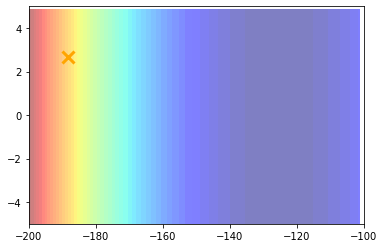

In [12]:
for i in range(len(x)):
    for j in range(len(y)):
        b=x[i]
        w=y[i]
        z[j][i]=0
        for n in range(len(x_data)):
            z[j][i]=z[j][i]+(y_data[n]-(-120)-w*x_data[n])**2
        z[j][i]=z[j][i]/len(x_data)
plt.contourf(x,y,z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.xlim(-200,-100)
plt.ylim(-5,5)
